In [1]:
#start the notebook: jupyter notebook
import matplotlib
matplotlib.use('nbAgg') #use this backend for getting plots inside the %notebook

In [2]:
import imexam

In [3]:
a=imexam.connect(viewer='ginga') #stars up a new tab with the ginga HTML5 viewer

read: e at 699.47, 351.6733333333333


<IPython.core.display.Javascript object>


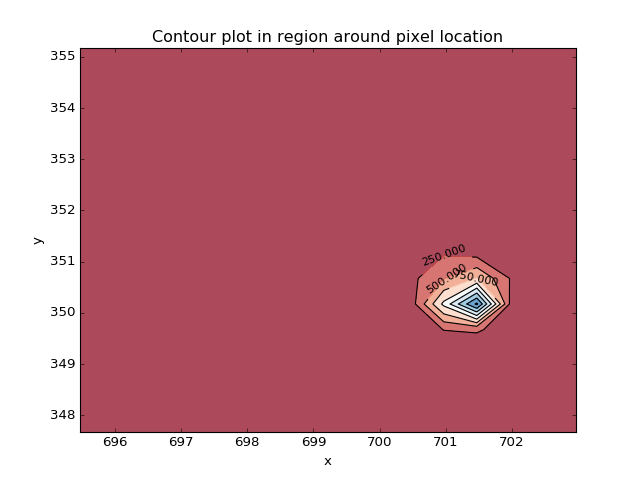

In [4]:
a.load_fits('iacs01t4q_flt.fits') #display fits image 

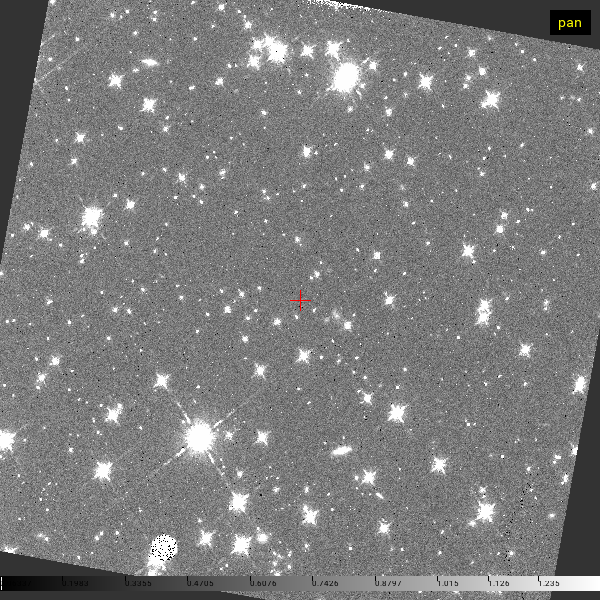

In [5]:
a.window.ginga_view.show()

In [6]:
a.get_viewer_info()

{1: {'extname': None,
  'extver': None,
  'filename': None,
  'hdu': <astropy.io.fits.hdu.image.ImageHDU at 0x1159e8eb8>,
  'image': <ginga.AstroImage.AstroImage at 0x105019978>,
  'iscube': False,
  'mef': False,
  'naxis': 0,
  'numaxis': 2,
  'user_array': None}}

read: e at 622.5586088905791, 268.94960656606344


<IPython.core.display.Javascript object>


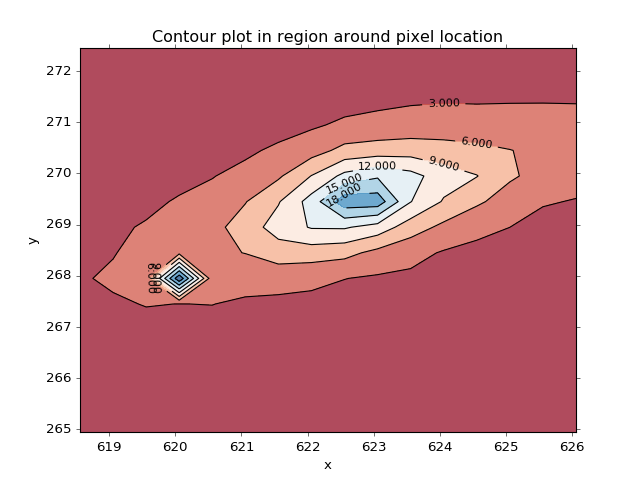

In [7]:
#entering imexam mode in the other window pressing "i"

In [8]:
a.close()

You must close the image window by hand
